IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

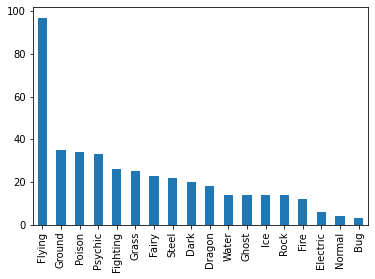

In [24]:
import pandas as pd
import matplotlib as plt
import numpy as np

pokemon_url='https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_pokemon.csv'
combats_url='https://raw.githubusercontent.com/rpdieego/IndigoTortoise-pkmn-notebooks/master/datasets_2619_4359_combats.csv'
pokemon_df=pd.read_csv(pokemon_url)
combats_df=pd.read_csv(combats_url)
##find missing values in pokemon_df

pokemon_df.isnull().sum()

##386 satırın Type 2 kolon değeri Null

##Type 2 kolon değeri null olan kayitlari getirelim

pokemon_df[pokemon_df['Type 2'].isnull()]

##pokemonların yüzde kaçının type 2 değerine sahip olduğuna bakalım

CountOfPokemonsHaveType2=pokemon_df[pokemon_df['Type 2'].isnull()==False].shape[0]
CountOfPokemonsNotHaveType2=pokemon_df[pokemon_df['Type 2'].isnull()==True].shape[0]
CountOfPokemonsHaveType2/(CountOfPokemonsHaveType2+CountOfPokemonsNotHaveType2)

##Type 2 kolonunda yer alan değerlerin  sayılarını bulalım..
Type2Counts=pokemon_df['Type 2'].value_counts()

##Type 2 kolon değer adetlerine göre bar grafiği çizdirelim
Type2Counts.plot.bar()


##input olarak verilen kolonların ortalamalarını hesaplayıp dönen fonksiyon yazalım..
def CalculateAvgOfColumns(column_list):

  avg_list = []
  for stat in column_list:
    avg = pokemon_df[stat].mean()
    avg_list.append(avg)

  return avg_list


ColList=['Attack','Defense','HP']
hs=CalculateAvgOfColumns(ColList)
hs


##Group By örnekleri Type 1 değerine göre attack değerlerinin ortlaması:

pokemon_df.groupby(by='Type 1')['Attack'].mean()

pokemon_df
combats_df
## 1 numaralı pokemonun kazandığı mücadelelerin sayisini bulalım

Kazanan=pokemon_df.merge(combats_df,how='inner',left_on='#',right_on='First_pokemon')
Kazanan[(Kazanan['First_pokemon']==1) & (Kazanan['Winner']==1)]['Name'].count()

##Legendary değeri False olup kazananın ilk pokemon olduğu durumları listeleyelim

Kazanan[(Kazanan['Legendary']==False) & (Kazanan['First_pokemon']==Kazanan['Winner'])]

##FirstPokWin şeklinde bir kolon ekleyelim ve kazananın 1.pokemon olduğu durumda 1 değerini başka bir durumda 0 değerini alsın

Kazanan['FirstPokWin']=np.where((Kazanan['First_pokemon']==Kazanan['Winner']),1,0)['N']

